## PytorchZeroToAll. Lec01

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating a tensor of 3 rows and 2 columns consisting of ones
x = torch.ones(3,2)
print(x)

# creating a tensor of 3 rows and 2 columns consisting of zeros
x = torch.zeros(3,2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [3]:
# To increase the reproducibility, we often set the random seed
# to a specific value first
torch.manual_seed(2)

# generating tensor randomly
x = torch.rand(3,2)
print(x)

# generating tensor from normal distiribution
x = torch.randn(3,3)
print(x)

tensor([[0.6147, 0.3810],
        [0.6371, 0.4745],
        [0.7136, 0.6190]])
tensor([[-2.1409, -0.5534, -0.5000],
        [-0.0815, -0.1633,  1.5277],
        [-0.4023,  0.0972, -0.5682]])


In [4]:
# create a tensor
x = torch.tensor([[1,2],
                  [3,4],
                  [5,6]])

print(x[:,1]) # slice every row and only the last column
print(x[0,:]) # slice every column in the first row

y = x[1,1] # take the element in the first row
           # and first column and create an another tensor
print(y)

tensor([2, 4, 6])
tensor([1, 2])
tensor(4)


In [5]:
x = torch.tensor([[1,2],
                  [3,4],
                  [5,6]]) # (3 rows and 2 columns)

y = x.view(2,3) # reshape to 2 rows and 3 columns
print(y)

y = x.view(6,-1) # y shape will be 6x1
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


In [6]:
# create two tensors
x = torch.ones([3,2])
y = torch.ones([3,2])

# add two tensors
z = x+y # method 1
z = torch.add(x,y) # method 2
print(z)

# subtract two tensors
z = x-y # method 1
torch.sub(x,y) # method 2
print(z)

y.add_(x) # tensor y added with x and result will be stored in y
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


In [7]:
x = torch.linspace(0, 1, steps = 5) # creating a tenosr using linspace
x_np = x.numpy() # convert tensor to numpy

print(x)
print(type(x), type(x_np)) # check the types

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])
<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [8]:
a = np.random.randn(5) # generate a random numpy array
a_pt = torch.from_numpy(a) # convert numpy array to a tensor

print(a)
print(type(a), type(a_pt))

[-0.35230437  2.19206121 -1.13001039 -0.83441208 -1.17504585]
<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [9]:
print(torch.cuda.device_count()) # Number of GPUs currently using

1


In [10]:
print(torch.cuda.get_device_name(0)) # Name of GPUs currently using

Tesla K80


In [11]:
# Assign cuda GPU located at location '0' to a variable
cuda0 = torch.device('cuda:0')

# performing the addition on GPU
a = torch.ones(3,2, device=cuda0) # create a tensor 'a' on GPU
b = torch.ones(3,2, device=cuda0) # create a tensor 'b' on GPU
c = a + b
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


In [12]:
# move the result to CPU
c = c.cpu()
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


In [13]:
# create a tensor with requires_grad=True
x = torch.ones([3,2], requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)


In [14]:
y = x+5 # tensor addition
print(y) # check the result

z = y*y + 1
print(z)

t = torch.sum(z) # add all the values in z
print(z)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)
tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)
tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)


In [15]:
t.backward() # perform backpropagation but pytorch will not print any output
print(x.grad) # d(t)/dx = 2y+1 at x = 1 and y = 6, where y = x + 5
              # where t = sum(y*y), and y = x + 5

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])


## PytorchZeroToAll. Lec02

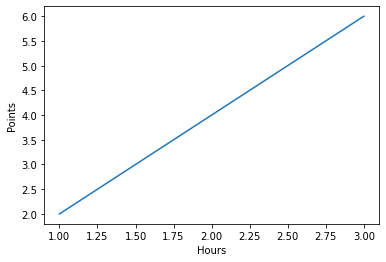

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

# Plot it all
plt.plot(x_data, y_data)
plt.xlabel('Hours')
plt.ylabel('Points')
plt.show()

In [17]:
w = 1.0 # a random guess: random value

# our model for the forward pass
def forward(x):
  return x*w

# Loss function
def loss(x,y):
  y_pred = forward(x)
  return (y_pred-y)**2

In [18]:
for w in np.arange(0.0, 4.1, 0.1):
  print('w = ', w)
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l
    print('\t', x_val, y_val, y_pred_val, l)

  print('MSE = ', l_sum / 3)

w =  0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE =  18.666666666666668
w =  0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE =  16.846666666666668
w =  0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE =  15.120000000000003
w =  0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE =  13.486666666666665
w =  0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE =  11.946666666666667
w =  0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE =  10.5
w =  0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE =  9.146666666666663
w =  0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2

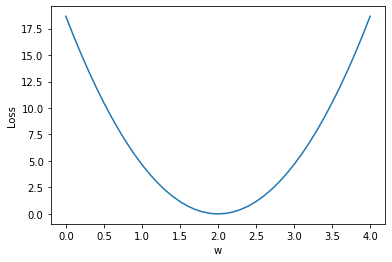

In [19]:
# List of weights / Mean Square Error (MSE) for each input
w_list = []
mse_list = []

for w in np.arange(0.0,4.1,0.1):
  # Print the weights and initialize the lost
  l_sum = 0

  for x_val, y_val in zip(x_data, y_data):
    # For each input and output, calculate y_hat
    # Compute the total loss and add to the total error
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l

  # Now compute the Mean Square Error (MSE) of each input
  # Aggregate the weight / MSE from this run

  w_list.append(w)
  mse_list.append(l_sum/3)

# Plot it all
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

## PytorchZeroToAll. Lec03


In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [21]:
x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = 1.0 # a random guess: random value

# our model for the forward pass
def forward(x):
  return x*w

# Loss function
def loss(x,y):
  y_pred = forward(x)
  return (y_pred-y)**2

# compute gradient
def gradient(x,y): # d_loss/d_w
  return 2*x*(x*w-y)

In [22]:
# Before training
print('predict (before training)', 4, forward(4))

# Training Loop
for epoch in range(100):
  for x_val, y_val in zip(x_data, y_data):
    grad = gradient(x_val, y_val)
    w = w - 0.01*grad
    print('\tgrad: ', x_val, y_val, grad)
    l = loss(x_val, y_val)

  print('progress: ', epoch, 'w = ', w, 'loss = ', l)

# After training
print('predict (after training)', '4 hours', forward(4))

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress:  0 w =  1.260688 loss =  4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress:  1 w =  1.453417766656 loss =  2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress:  2 w =  1.5959051959019805 loss =  1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress:  3 w =  1.701247862192685 loss =  0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress:  4 w =  1.7791289594933983 loss =  0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress:  5 w =  1.836707389300983 loss =  0.2399802903801062
	grad:  1.0 2.0